In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Student_performance_data_.csv
### Encodings
Age:
- range from 15-18

Gender:
- 0: Male 
- 1: Female

Ethnicity:
- 0: Caucasian
- 1: African American
- 2: Asian
- 3: Other

Parental Education:
- 0: None
- 1: High School
- 2: Some College
- 3: Bachelor's
- 4: Higher

Study Time Weekly: in hours
- range from 0-20

Absences: # of absences during school year
- range from 0-30

Tutoring:
- 0: No
- 1: Yes

Parental Support: (level of support)
- 0: None
- 1: Low
- 2: Moderate
- 3: High
- 4: Very High

Extracurricular: (participation)
- 0: No
- 1: Yes

Sports: 
- 0: No
- 1: Yes

Music:
- 0: No
- 1: Yes

Volunteering:
- 0: No
- 1: Yes

GPA:
- range from 2.0 to 4.0

Grade Class: (TARGET VARIABLE)
- 0: 'A' , GPA >= 3.5
- 1: 'B' , 3.0 <= GPA < 3.5
- 2: 'C' , 2.5 <= GPA < 3
- 3: 'D' , 2.0 <= GPA < 2.5
- 4: 'F' , GPA < 2.0

In [ ]:
student_performance_data = pd.read_csv("/Users/johnathangarcia/Downloads/studentPerformancePredictor/data/Student_performance_data _.csv")

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [ ]:
print(student_performance_data.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [5]:
print(student_performance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None


In [ ]:
# ALREADY RAN
# student ID ranges from 1001 to 3392, so let's subtract 1001 so we can have clean IDs from 0 to 2391
student_performance_data["StudentID"] = student_performance_data["StudentID"] - 1001

In [8]:
print(student_performance_data.head(25))

    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0           0   17       1          0                  2        19.833723   
1           1   18       0          0                  1        15.408756   
2           2   15       0          2                  3         4.210570   
3           3   17       1          0                  3        10.028829   
4           4   17       1          0                  2         4.672495   
5           5   18       0          0                  1         8.191219   
6           6   15       0          1                  1        15.601680   
7           7   15       1          1                  4        15.424496   
8           8   17       0          0                  0         4.562008   
9           9   16       1          0                  1        18.444466   
10         10   17       0          0                  1        11.851364   
11         11   17       0          0                  1         7.598486   

In [9]:
student_performance_data["StudyTimeWeekly"] = student_performance_data["StudyTimeWeekly"].round()

In [10]:
print(student_performance_data)

      StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0             0   17       1          0                  2             20.0   
1             1   18       0          0                  1             15.0   
2             2   15       0          2                  3              4.0   
3             3   17       1          0                  3             10.0   
4             4   17       1          0                  2              5.0   
...         ...  ...     ...        ...                ...              ...   
2387       2387   18       1          0                  3             11.0   
2388       2388   17       0          0                  1              8.0   
2389       2389   16       1          0                  2              7.0   
2390       2390   16       1          1                  0             12.0   
2391       2391   16       1          0                  2             18.0   

      Absences  Tutoring  ParentalSupport  Extracur

In [12]:
student_performance_data["GPA"] = student_performance_data["GPA"].round(2)

In [16]:
print(student_performance_data.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          0   17       1          0                  2             20.0   
1          1   18       0          0                  1             15.0   
2          2   15       0          2                  3              4.0   
3          3   17       1          0                  3             10.0   
4          4   17       1          0                  2              5.0   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering   GPA  GradeClass  
0             0  2.93         2.0  
1             0  3.04     

In [17]:
student_performance_data.to_csv("NEW_Student_performance_data_.csv", index = False)

<Axes: >

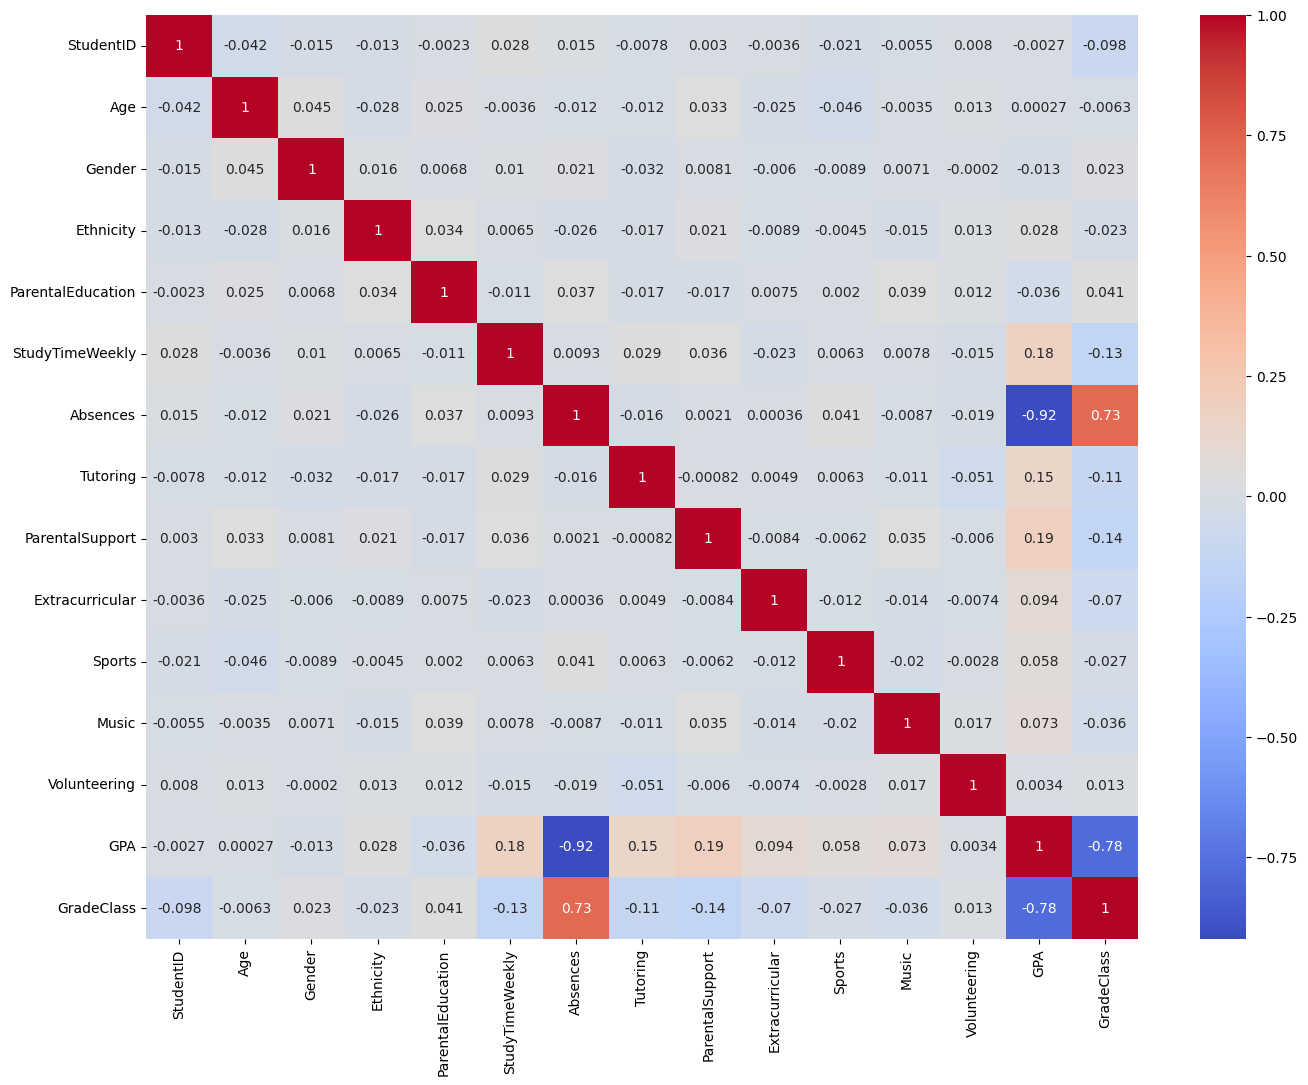

In [22]:
plt.figure(figsize=(16,12))
sns.heatmap(student_performance_data.corr(), annot = True, cmap = 'coolwarm')

### The biggest thing I see here is a negative correlation between GPA and absences. Let's explore the relationship between GPA and absences

<Axes: xlabel='GPA', ylabel='Absences'>

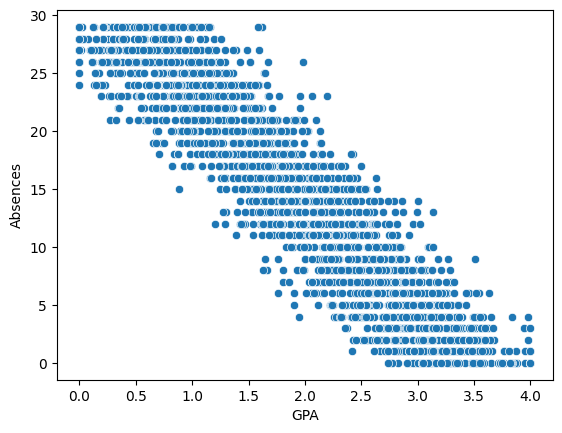

In [23]:
sns.scatterplot(x = "GPA", y = "Absences", data = student_performance_data)

### Indeed, as GPA increases, the number of absences decreases almost linearly